In [7]:
%matplotlib notebook

## 1.) Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from random import sample

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## 2.) Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# Select a random sample of 500 cities from list generated in above cell
cities_sample = sample(cities,500)

## 3.) Generate API Calls to Create Dataframe

In [4]:
# Create API calls to pull current weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = 'imperial'

city_name = 'busselton'


query_url = f'{base_url}{city_name}&appid={weather_api_key}&units={units}'

response = requests.get(query_url).json()


In [5]:
# Loop through list of cities in sets of 50, append records to dataframe
# Sleep for 30 seconds in between each set

# Create blank dataframe with relevant fields, so that records from loop can be added in
column_names = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
city_weather_df = pd.DataFrame(columns=column_names)

# ---------- BEGIN LOOP FOR BULK API CALL ----------
# Set starting index # for city loop, so that you continue through each city list as you progres to subsequent set
city_loop_index = 0
for loop_set in range(0,10):
    print(f'--------- Set {loop_set + 1} of 10 ---------- ')
    # Loop through cities and make API calls
    for city_index in range(0,50):
        # Add city_loop_index variable to ensure that loop continues through list of 500
        final_index = city_index + city_loop_index
        # Pull current city
        city_name = cities_sample[final_index]
        # Generate query string
        query_url = f'{base_url}{city_name}&appid={weather_api_key}&units={units}'
        # Make API Call
        response = requests.get(query_url).json()
        # Create try/except block to skip record if city is not found
        try:
            # Extract relevant data from response
            latitude = response['coord']['lat']
            longitude = response['coord']['lon']
            max_temp = response['main']['temp_max']
            humidity = response['main']['humidity']
            cloudiness = response['clouds']['all']
            wind_speed = response['wind']['speed']
            country = response['sys']['country']
            date = response['dt']
            # Create dictionary to append to df
            record_dict = {
                'City':city_name,
                'Lat':latitude,
                'Lng':longitude,
                'Max Temp':max_temp,
                'Humidity':humidity,
                'Cloudiness':cloudiness,
                'Wind Speed':wind_speed,
                'Country':country,
                'Date':date
            }
            # Append record dict to city_weather_df
            city_weather_df = city_weather_df.append(record_dict,ignore_index=True)
            print(f'City {city_name} found successfully as record {city_index + 1} of set {loop_set + 1}.')
        except (KeyError,IndexError):
            print(f'City {city_name} not found. Skipping...')
    # ---------- Outer Loop ----------
    # Add 50 to city_loop_index to ensure that inner loop continues with next set of 50 cities
    city_loop_index += 50
    # Sleep for 30 seconds in between each set
    time.sleep(30)

print('---------- Data Retrieval Complete ----------')
            

--------- Set 1 of 10 ---------- 
City bonavista found successfully as record 1 of set 1.
City manuk mangkaw found successfully as record 2 of set 1.
City baykit found successfully as record 3 of set 1.
City ruidoso found successfully as record 4 of set 1.
City imbituba found successfully as record 5 of set 1.
City selenginsk found successfully as record 6 of set 1.
City jabiru not found. Skipping...
City marsh harbour found successfully as record 8 of set 1.
City rawson found successfully as record 9 of set 1.
City mount gambier found successfully as record 10 of set 1.
City sibolga found successfully as record 11 of set 1.
City vostok found successfully as record 12 of set 1.
City santa cruz de la palma found successfully as record 13 of set 1.
City grand centre not found. Skipping...
City linhares found successfully as record 15 of set 1.
City bull savanna found successfully as record 16 of set 1.
City karakol found successfully as record 17 of set 1.
City harnosand found successful

City faanui found successfully as record 48 of set 3.
City vaini found successfully as record 49 of set 3.
City oliver found successfully as record 50 of set 3.
--------- Set 4 of 10 ---------- 
City russell found successfully as record 1 of set 4.
City kavieng found successfully as record 2 of set 4.
City port hawkesbury found successfully as record 3 of set 4.
City saint-philippe found successfully as record 4 of set 4.
City chuy found successfully as record 5 of set 4.
City medowie found successfully as record 6 of set 4.
City hobyo found successfully as record 7 of set 4.
City amderma not found. Skipping...
City mehamn found successfully as record 9 of set 4.
City barrow found successfully as record 10 of set 4.
City ajuchitlan found successfully as record 11 of set 4.
City kazalinsk not found. Skipping...
City moron found successfully as record 13 of set 4.
City lorengau found successfully as record 14 of set 4.
City thompson found successfully as record 15 of set 4.
City kavaratt

City la ronge found successfully as record 47 of set 6.
City waitati found successfully as record 48 of set 6.
City cervo found successfully as record 49 of set 6.
City karema found successfully as record 50 of set 6.
--------- Set 7 of 10 ---------- 
City edd found successfully as record 1 of set 7.
City thabazimbi found successfully as record 2 of set 7.
City bakal found successfully as record 3 of set 7.
City teutonia found successfully as record 4 of set 7.
City mount isa found successfully as record 5 of set 7.
City kiruna found successfully as record 6 of set 7.
City carnarvon found successfully as record 7 of set 7.
City huntsville found successfully as record 8 of set 7.
City mednogorsk found successfully as record 9 of set 7.
City bowen found successfully as record 10 of set 7.
City zheleznodorozhnyy found successfully as record 11 of set 7.
City yar-sale found successfully as record 12 of set 7.
City arraial do cabo found successfully as record 13 of set 7.
City falealupo not

City bressanone found successfully as record 46 of set 9.
City darlowo found successfully as record 47 of set 9.
City bailieborough found successfully as record 48 of set 9.
City la suiza found successfully as record 49 of set 9.
City miyazu found successfully as record 50 of set 9.
--------- Set 10 of 10 ---------- 
City ostrovnoy found successfully as record 1 of set 10.
City launceston found successfully as record 2 of set 10.
City maroon town found successfully as record 3 of set 10.
City sao miguel do araguaia found successfully as record 4 of set 10.
City carbonia found successfully as record 5 of set 10.
City khandbari found successfully as record 6 of set 10.
City paka found successfully as record 7 of set 10.
City narsaq found successfully as record 8 of set 10.
City shrigonda found successfully as record 9 of set 10.
City inuvik found successfully as record 10 of set 10.
City faya found successfully as record 11 of set 10.
City dolbeau not found. Skipping...
City codrington f

In [6]:
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonavista,48.6499,-53.1147,48.20,76,100,8.05,CA,1619133245
1,manuk mangkaw,4.8000,119.8500,80.82,77,21,2.86,PH,1619133246
2,baykit,61.6700,96.3700,25.83,90,100,4.74,RU,1619133246
3,ruidoso,33.3317,-105.6730,64.40,13,1,26.46,US,1619133246
4,imbituba,-28.2400,-48.6703,68.00,83,20,6.91,BR,1619133246
...,...,...,...,...,...,...,...,...,...
462,shache,38.4167,77.2406,50.41,14,12,6.73,CN,1619133616
463,leningradskiy,69.3833,178.4167,34.56,81,92,1.10,RU,1619133616
464,sisimiut,66.9395,-53.6735,30.11,75,61,6.91,GL,1619133617
465,helena,46.5927,-112.0361,35.60,64,90,14.97,US,1619133617


## 4.) Generate Scatter Plots

<IPython.core.display.Javascript object>


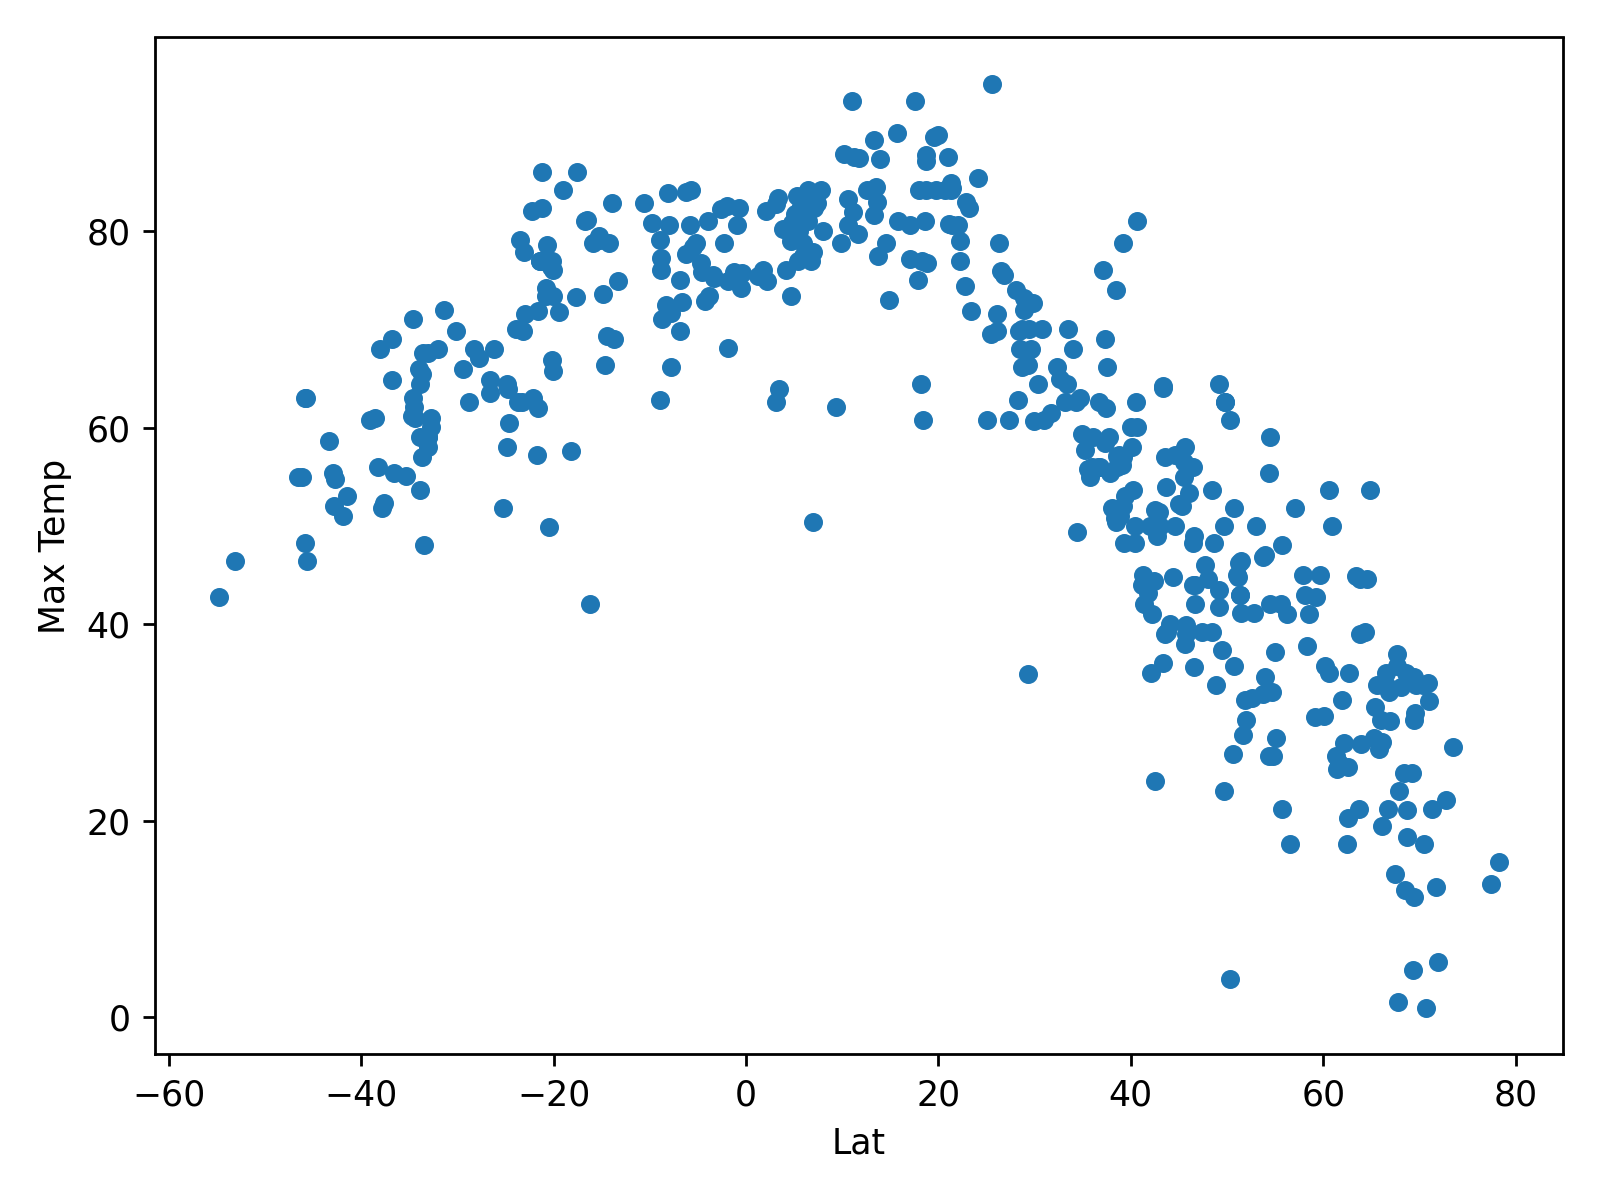

In [9]:
# 1.) Temperature (F) vs. Latitude
temp_vs_latitude_scatter = city_weather_df.plot.scatter(x='Lat',y='Max Temp')
plt.show()
plt.tight_layout()